<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/estudo-dados-eleicoes/blob/master/PieRRestudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
arraio = list(map(lambda x : random.randint(0,100),range(100)))

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/dados eleições/votacao_partido_munzona_2020_BRASIL.csv',sep=";",encoding='latin-1')

In [4]:
dados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
0,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,12,PDT,Partido Democrático Trabalhista,40000119180,PARTIDO ISOLADO,PDT,N,457,65
1,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,15,MDB,Movimento Democrático Brasileiro,250000087767,PARTIDO ISOLADO,MDB,N,1246,191
2,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,17,PSL,Partido Social Liberal,250000112022,PARTIDO ISOLADO,PSL,N,1142,14
3,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,22,PL,Partido Liberal,30000112069,PARTIDO ISOLADO,PL,N,1484,14
4,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,25,DEM,Democratas,210000069700,PARTIDO ISOLADO,DEM,N,407,37


In [5]:
queryPrimeiroTurno = dados[
    (dados['NR_TURNO'] == 1)
    &(dados['DS_CARGO'] == 'Prefeito')
]
querySegundoTurno = dados[
    (dados['NR_TURNO'] == 2)
    &(dados['DS_CARGO'] == 'Prefeito')
]
queryPrimeiroTurno.shape,querySegundoTurno.shape

((23393, 28), (687, 28))

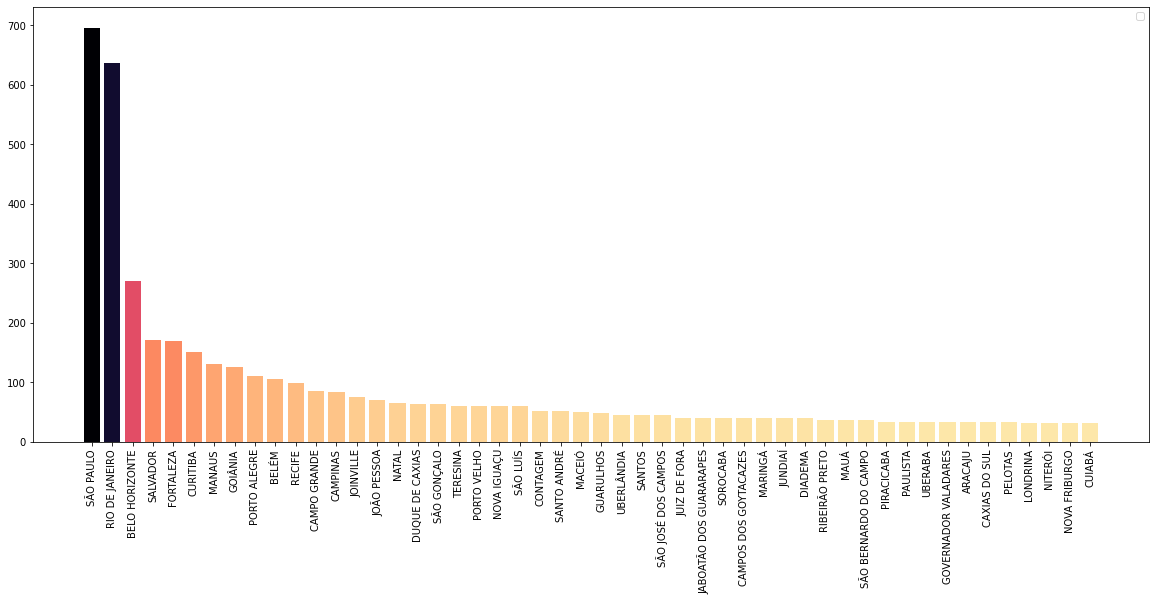

In [6]:
nm_urnas_primeiro_turno = queryPrimeiroTurno.groupby(by=['NM_MUNICIPIO']).agg(
    quantidade = ('DS_CARGO','count')
)

nm_urnas_primeiro_turno.sort_values('quantidade', inplace=True, ascending=False)



def showarQnt(data,color,extraFunctions=[]):
  fig, ax = plt.subplots()
  for i in extraFunctions:
    i(fig,ax)
  amostra = data['quantidade'].values[:50]
  colors = sns.color_palette(color,np.max(amostra+1))
  bar_colors = list(map(lambda num : colors[num],amostra))

  ax.bar( 
      data.index[:50], 
      data['quantidade'][:50],
      color=bar_colors[:50]
       )
  fig.set_size_inches(20,8)
  ax.legend()
  plt.rcParams.update({'font.size': 20})
  plt.xticks(rotation = 90)
  plt.show()

showarQnt(nm_urnas_primeiro_turno,'magma_r')

In [7]:
queryPrimeiroTurno.drop(columns=
                        ['ANO_ELEICAO',
                         'DT_GERACAO',
                         'HH_GERACAO',
                         'CD_TIPO_ELEICAO',
                         'NM_TIPO_ELEICAO',
                         'NR_TURNO',
                         'CD_ELEICAO',
                         'DS_ELEICAO',
                         ])

,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
14,15/11/2020,M,RS,88994,SAPIRANGA,88994,SAPIRANGA,131,11,Prefeito,Coligação,11,PP,PROGRESSISTAS,210000069668,TRABALHO E COMPROMISSO POR SAPIRANGA,PP / PTB,N,18285,0
38,15/11/2020,M,PR,75744,ROSÁRIO DO IVAÍ,75744,ROSÁRIO DO IVAÍ,136,11,Prefeito,Coligação,55,PSD,Partido Social Democrático,160000089839,"UNIDOS COM A FORÇA DO POVO, UM NOVO TEMPO VAI ...",PSD / PSB / MDB,N,1002,0
43,15/11/2020,M,BA,33430,ARAMARI,33430,ARAMARI,163,11,Prefeito,Partido isolado,13,PT,Partido dos Trabalhadores,50000092047,PARTIDO ISOLADO,PT,N,548,0
46,15/11/2020,M,MG,48933,NOVA ERA,48933,NOVA ERA,193,11,Prefeito,Coligação,12,PDT,Partido Democrático Trabalhista,130000112253,OUVIR PRA GOVERNAR,MDB / PDT,N,3033,0
85,15/11/2020,M,MG,53279,SERITINGA,53279,SERITINGA,6,11,Prefeito,Coligação,25,DEM,Democratas,130000145252,UNIDOS POR SERITINGA,PTB / PSDB / DEM,N,934,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77881,15/11/2020,M,BA,34592,COARACI,34592,COARACI,135,11,Prefeito,Coligação,13,PT,Partido dos Trabalhadores,50000155260,A FORÇA DA UNIÃO,PSD / PROS / PSB / PT,N,4286,0
77883,15/11/2020,M,MT,91090,VILA BELA DA SANTÍSSIMA TRINDADE,91090,VILA BELA DA SANTÍSSIMA TRINDADE,25,11,Prefeito,Coligação,25,DEM,Democratas,110000158379,UNIDOS COM CONSCIÊNCIA POR VILA BELA,PTB / DEM / REPUBLICANOS / PP,N,2608,0
77888,15/11/2020,M,SC,81990,MAFRA,81990,MAFRA,22,11,Prefeito,Partido isolado,15,MDB,Movimento Democrático Brasileiro,240000148625,PARTIDO ISOLADO,MDB,N,6114,0
77897,15/11/2020,M,MG,42048,DOM BOSCO,42048,DOM BOSCO,329,11,Prefeito,Partido isolado,55,PSD,Partido Social Democrático,130000139395,PARTIDO ISOLADO,PSD,N,237,0


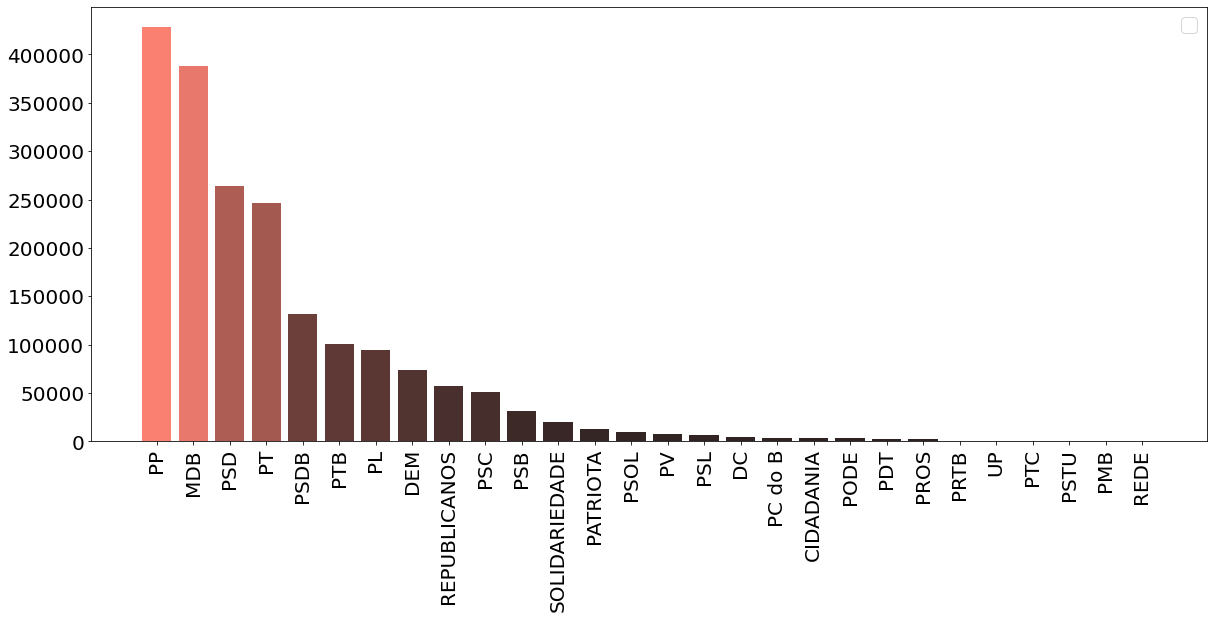

In [8]:
queryPrimeiroTurnoPI = dados[
    (dados['NR_TURNO'] == 1) & 
    (dados['DS_CARGO'] == 'Prefeito') &
    (dados['SG_UF'] == 'PI')
]

votosPorPartidoPI = queryPrimeiroTurnoPI[['SG_PARTIDO','QT_VOTOS_NOMINAIS','SG_UF']].groupby( by=['SG_PARTIDO'] ).agg(
    quantidade=( 'QT_VOTOS_NOMINAIS', 'sum')
)

votosPorPartidoPI.sort_values('quantidade', inplace=True, ascending=False)
showarQnt(votosPorPartidoPI,'dark:salmon')

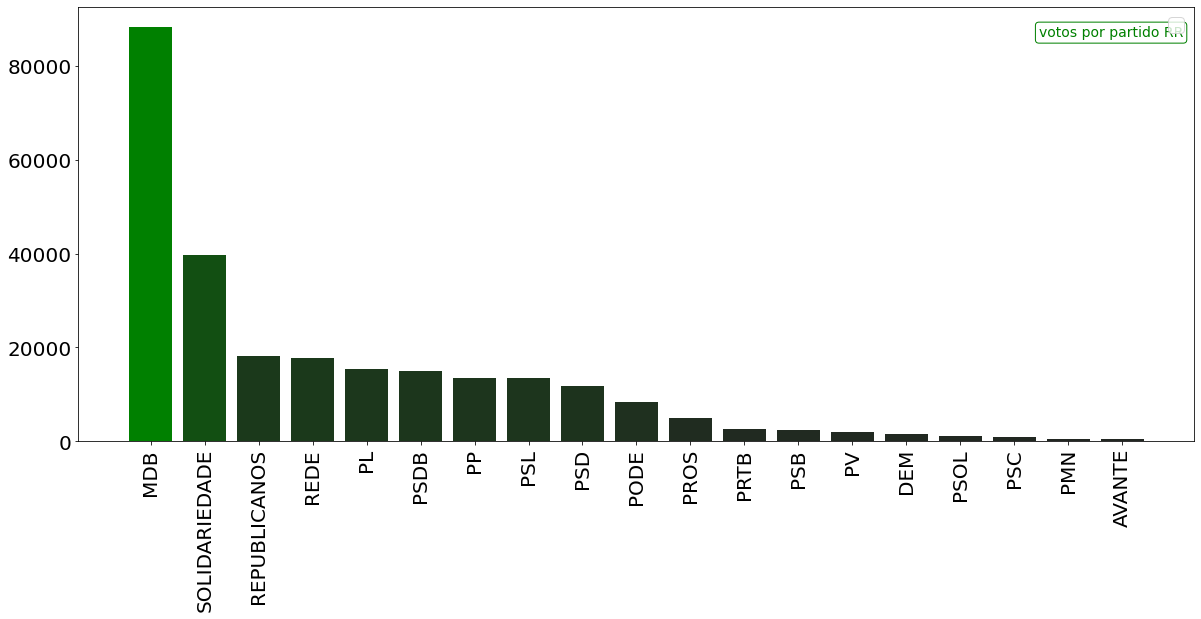

In [9]:
queryPrimeiroTurnoRR = dados[
    (dados['NR_TURNO'] == 1) & 
    (dados['DS_CARGO'] == 'Prefeito') &
    (dados['SG_UF'] == 'RR')
]

votosPorPartidoRR = queryPrimeiroTurnoRR[['SG_PARTIDO','QT_VOTOS_NOMINAIS','SG_UF']].groupby( by=['SG_PARTIDO'] ).agg(
    quantidade=( 'QT_VOTOS_NOMINAIS', 'sum')
)

votosPorPartidoRR.sort_values('quantidade', inplace=True, ascending=False)
def eF(plt,ax):
  ax.annotate(
    f'votos por partido RR',
    xy=(0.99, 0.94),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=14,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
  )
showarQnt(votosPorPartidoRR,'dark:green',extraFunctions=[eF])